### TASK 1 and 2

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("us_election.xlsx")
df = df[:31]
df

,Party Victory,Year,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,Winner
0,p1,1864.0,n,n,n,n,y,n,n,y,y,n,n
1,p2,1868.0,y,y,n,n,n,n,y,y,y,n,y
2,p3,1872.0,y,y,n,n,y,n,y,n,n,n,y
3,p4,1880.0,y,n,n,y,n,n,y,y,n,n,n
4,p5,1888.0,n,n,n,n,y,n,n,n,n,n,n
5,p6,1900.0,n,y,n,n,y,n,y,n,n,n,n
6,p7,1904.0,y,y,n,n,y,n,n,n,n,n,y
7,p8,1908.0,y,y,n,n,n,n,n,y,n,n,n
8,p9,1916.0,n,n,n,n,y,n,n,y,n,n,n
9,p10,1924.0,n,y,y,n,y,n,y,y,n,y,n


In [6]:
df.replace({'y': 1, 'n': 0}, inplace=True)
df

,Party Victory,Year,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,Winner
0,p1,1864.0,0,0,0,0,1,0,0,1,1,0,0
1,p2,1868.0,1,1,0,0,0,0,1,1,1,0,1
2,p3,1872.0,1,1,0,0,1,0,1,0,0,0,1
3,p4,1880.0,1,0,0,1,0,0,1,1,0,0,0
4,p5,1888.0,0,0,0,0,1,0,0,0,0,0,0
5,p6,1900.0,0,1,0,0,1,0,1,0,0,0,0
6,p7,1904.0,1,1,0,0,1,0,0,0,0,0,1
7,p8,1908.0,1,1,0,0,0,0,0,1,0,0,0
8,p9,1916.0,0,0,0,0,1,0,0,1,0,0,0
9,p10,1924.0,0,1,1,0,1,0,1,1,0,1,0


In [7]:
party_p = df[df['Party Victory'].str.startswith('p')]
party_o = df[df['Party Victory'].str.startswith('o')]


z = np.random.randint(40,61)
test_party_p = party_p.sample(3, random_state=z)
test_party_o = party_o.sample(2, random_state=z)
test_set = pd.concat([test_party_p, test_party_o])

train_set = df.drop(test_set.index)

test_set

,Party Victory,Year,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,Winner
1,p2,1868.0,1,1,0,0,0,0,1,1,1,0,1
3,p4,1880.0,1,0,0,1,0,0,1,1,0,0,0
2,p3,1872.0,1,1,0,0,1,0,1,0,0,0,1
21,o4,1892.0,0,0,1,0,1,0,0,1,1,0,1
25,o8,1932.0,1,1,0,0,1,1,0,0,1,0,1


In [8]:
def run_decision_tree(train_set, test_set):
    X_train = train_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
    y_train = train_set['Winner']
    X_test = test_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
    y_test = test_set['Winner']

    # Create a decision tree classifier
    clf = DecisionTreeClassifier()

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # test results
    test_results = test_set.copy()
    test_results["Predicted Value"] = y_pred
    
    # Print the test set including the actual and predicted values
    print("Test DataFrame with Actual and Predicted Values:")
    print(test_results)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
    # Plot the decision tree
    plt.figure(figsize=(15, 10))
    plot_tree(clf, filled=True, feature_names=X_train_df.columns, class_names=['n', 'y'], rounded=True)
    plt.show()

In [9]:
def decision_tree_pruning(train_set, test_set):
    
    X_train = train_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
    y_train = train_set['Winner']
    X_test = test_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
    y_test = test_set['Winner']

    # Values of m to try
    m_values = [2, 3, 4]

    # Store accuracies for different values of m
    train_accuracies = []
    test_accuracies = []

    for m in m_values:
        # Create a decision tree classifier
        clf = DecisionTreeClassifier(min_samples_split=m)

        # Train the classifier on the training data
        clf.fit(X_train, y_train)

        # Make predictions on the training and test data
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # Calculate accuracy for training and test sets
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Store accuracies
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(m_values, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(m_values, test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('min_samples_split (m)')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves for Decision Trees with Pruning')
    plt.legend()
    plt.show()

Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
1             p2  1868.0           1           1           0           0   
3             p4  1880.0           1           0           0           1   
2             p3  1872.0           1           1           0           0   
21            o4  1892.0           0           0           1           0   
25            o8  1932.0           1           1           0           0   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
1            0           0           1           1           1            0   
3            0           0           1           1           0            0   
2            1           0           1           0           0            0   
21           1           0           0           1           1            0   
25           1           1           0           0           1            0   

    Winner  Predict

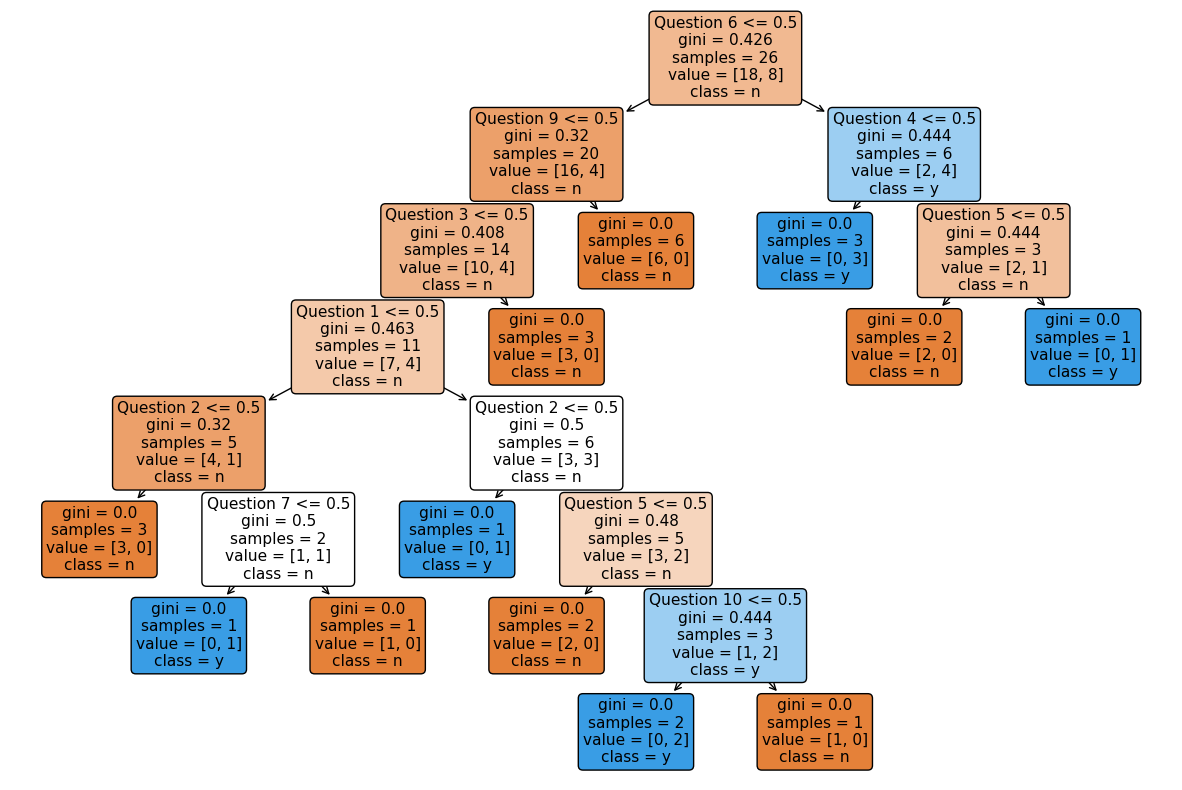

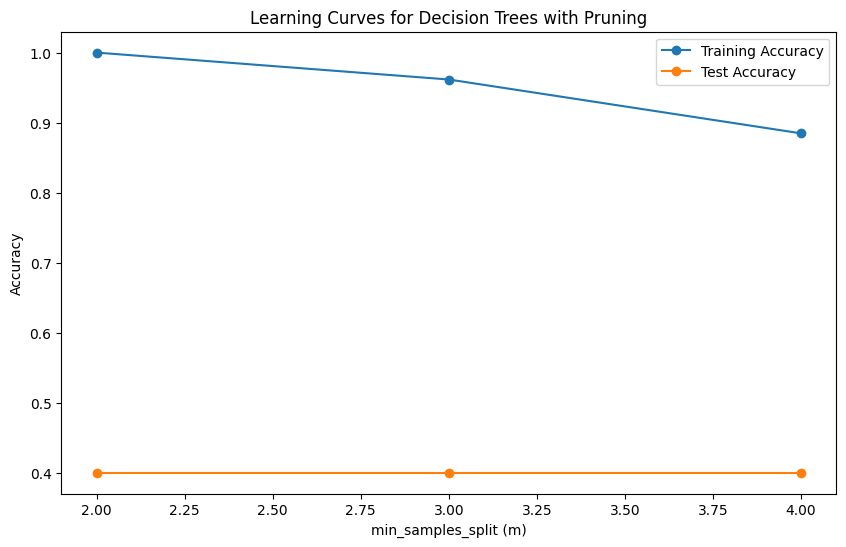

In [10]:
run_decision_tree(train_set, test_set)
decision_tree_pruning(train_set, test_set)

Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
2             p3  1872.0           1           1           0           0   
14           p15  1948.0           1           1           1           0   
4             p5  1888.0           0           0           0           0   
20            o3  1884.0           1           0           0           1   
28           o11  1968.0           1           1           1           1   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
2            1           0           1           0           0            0   
14           1           0           0           1           0            0   
4            1           0           0           0           0            0   
20           0           0           1           0           1            0   
28           0           0           1           1           1            0   

    Winner  Predict

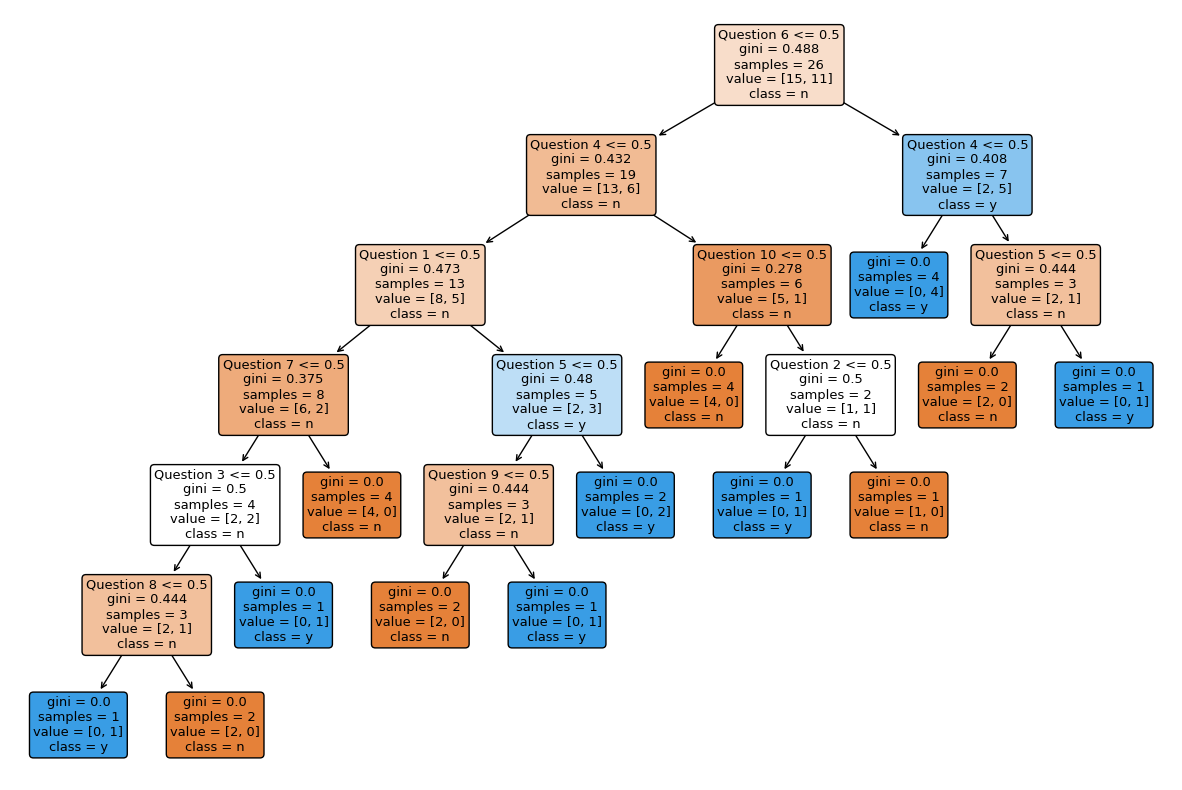

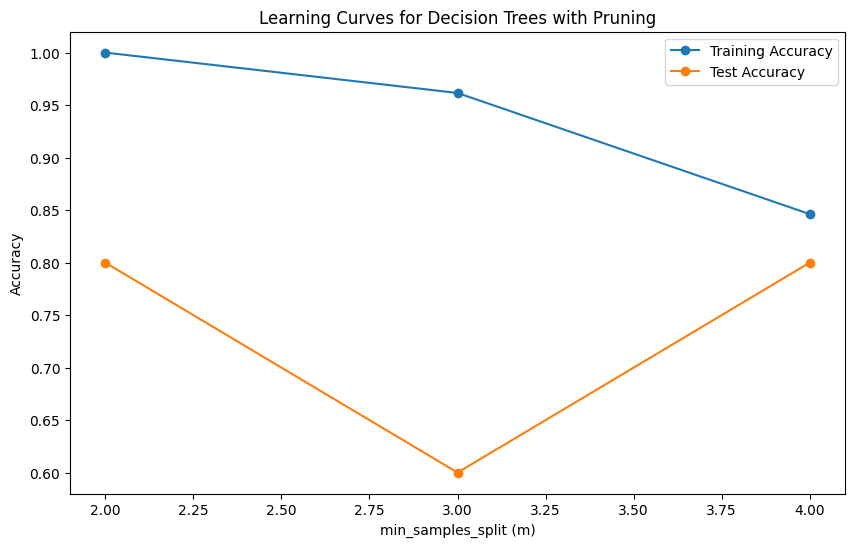

Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
5             p6  1900.0           0           1           0           0   
3             p4  1880.0           1           0           0           1   
13           p14  1944.0           1           1           0           0   
26            o9  1952.0           1           0           0           1   
28           o11  1968.0           1           1           1           1   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
5            1           0           1           0           0            0   
3            0           0           1           1           0            0   
13           1           0           1           1           0            0   
26           0           0           1           0           0            1   
28           0           0           1           1           1            0   

    Winner  Predict

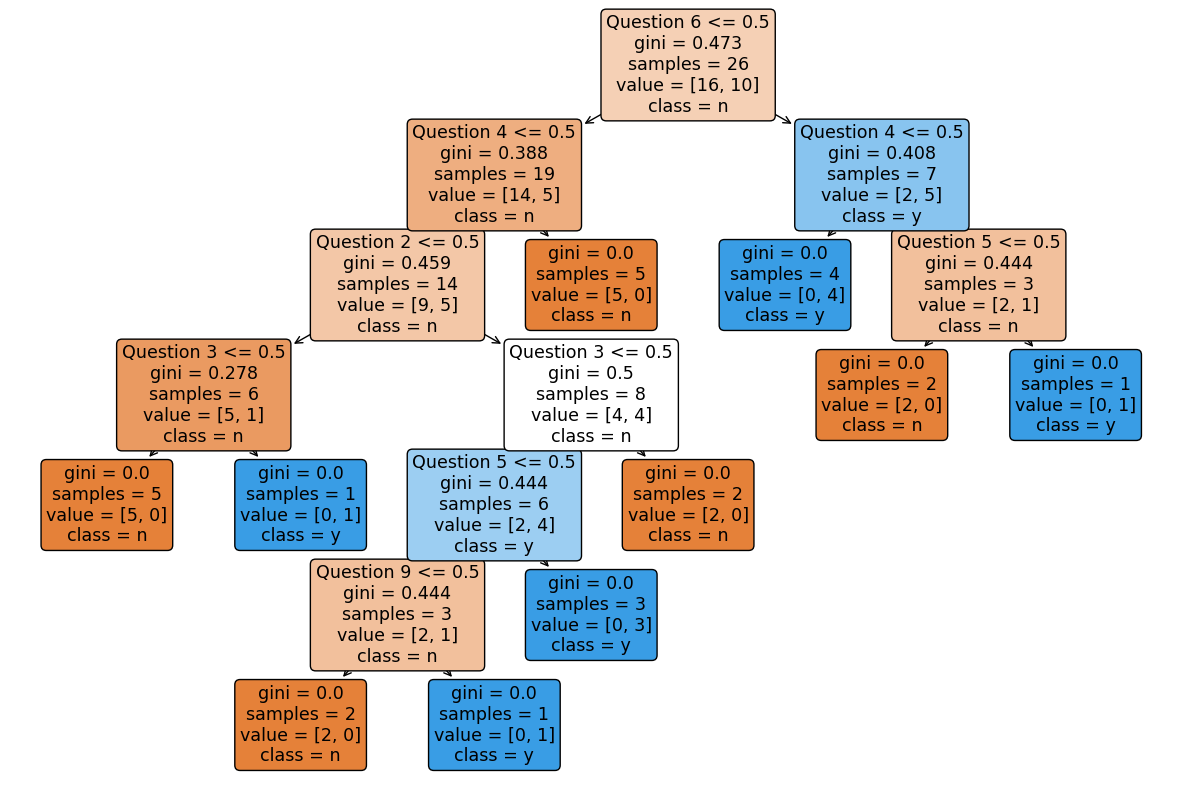

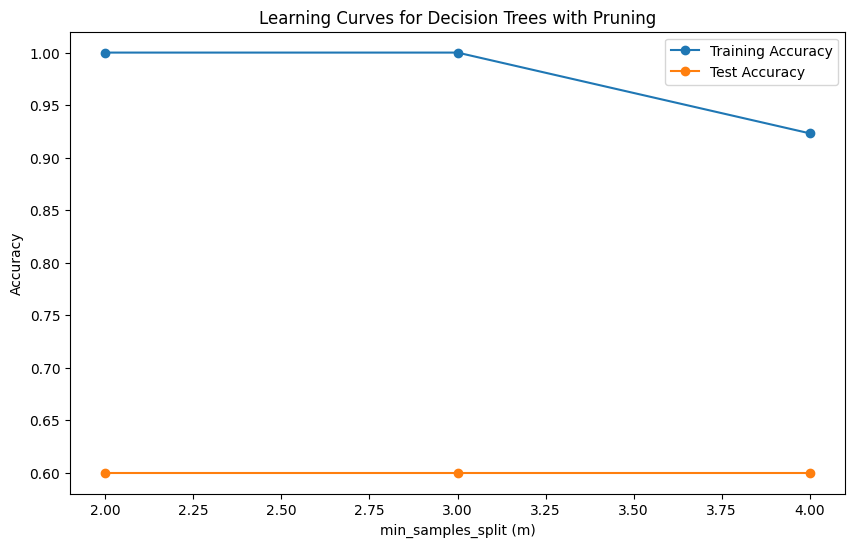

Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
9            p10  1924.0           0           1           1           0   
16           p17  1964.0           0           0           0           0   
12           p13  1940.0           1           1           0           0   
22            o5  1896.0           0           0           0           1   
20            o3  1884.0           1           0           0           1   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
9            1           0           1           1           0            1   
16           1           0           1           0           0            0   
12           1           1           1           1           0            0   
22           0           1           0           1           1            0   
20           0           0           1           0           1            0   

    Winner  Predict

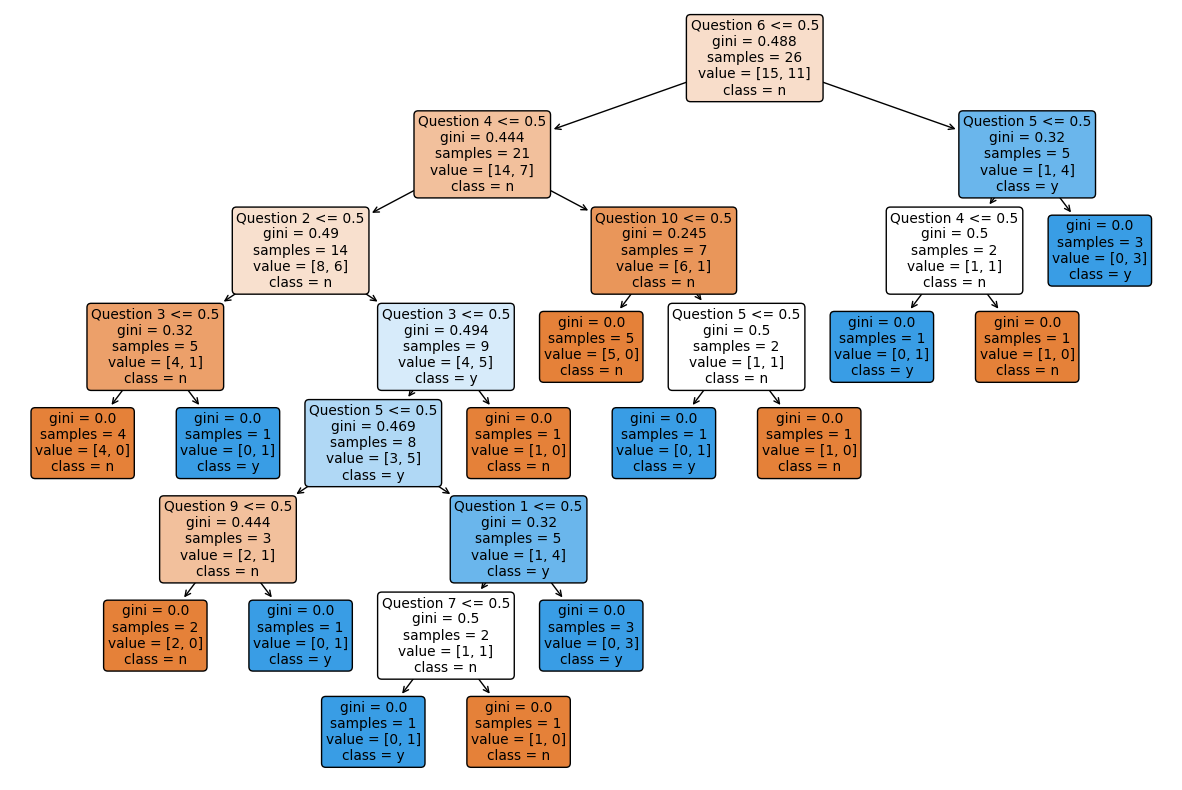

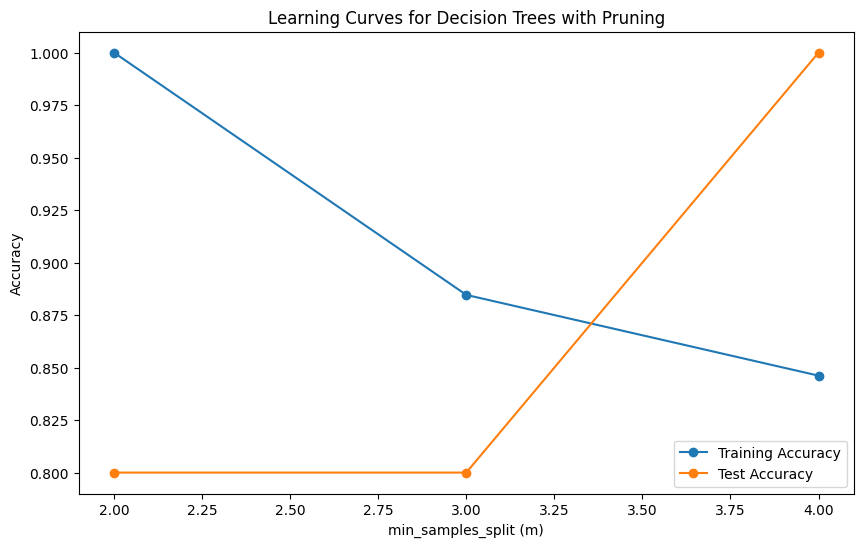

Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
1             p2  1868.0           1           1           0           0   
7             p8  1908.0           1           1           0           0   
17           p18  1972.0           0           0           0           0   
19            o2  1876.0           1           1           0           1   
24            o7  1920.0           1           0           0           1   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
1            0           0           1           1           1            0   
7            0           0           0           1           0            0   
17           1           0           1           1           1            0   
19           0           1           0           0           0            1   
24           0           0           0           1           1            0   

    Winner  Predict

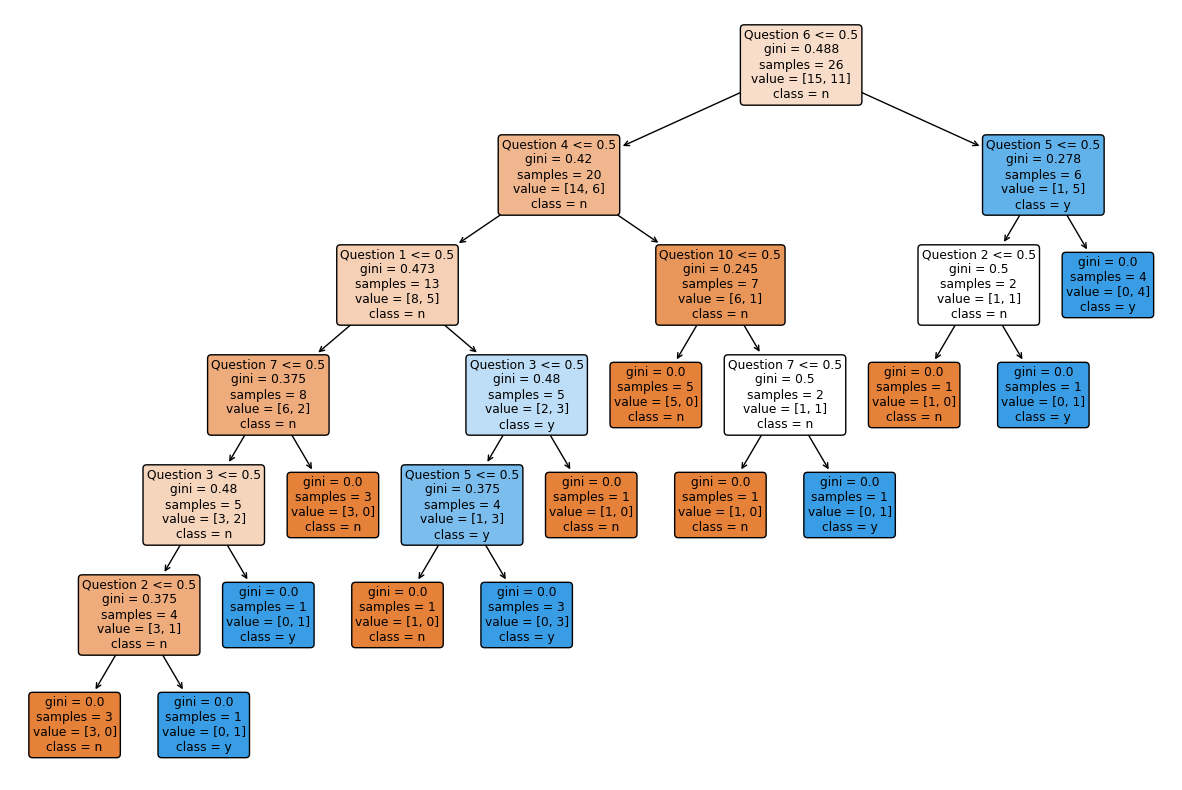

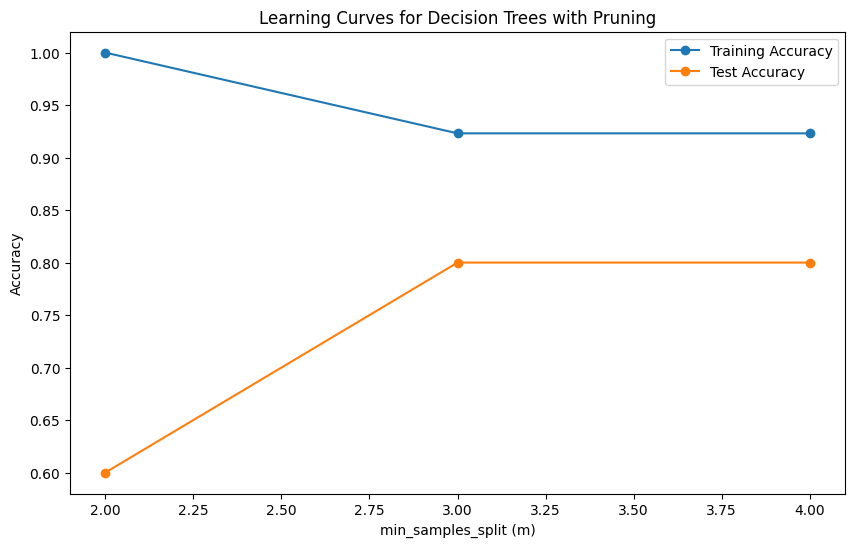

Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
1             p2  1868.0           1           1           0           0   
16           p17  1964.0           0           0           0           0   
10           p11  1928.0           1           1           0           0   
23            o6  1912.0           1           1           1           1   
28           o11  1968.0           1           1           1           1   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
1            0           0           1           1           1            0   
16           1           0           1           0           0            0   
10           0           0           1           0           0            0   
23           1           0           1           0           0            0   
28           0           0           1           1           1            0   

    Winner  Predict

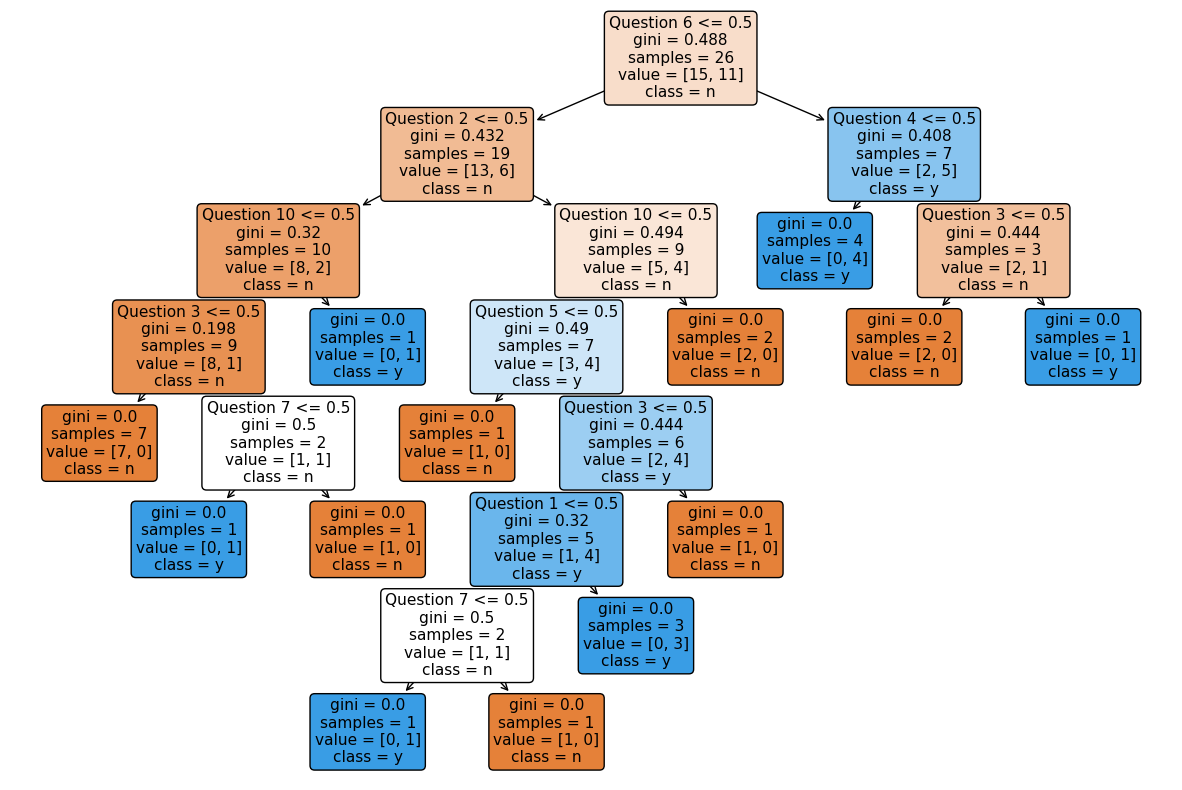

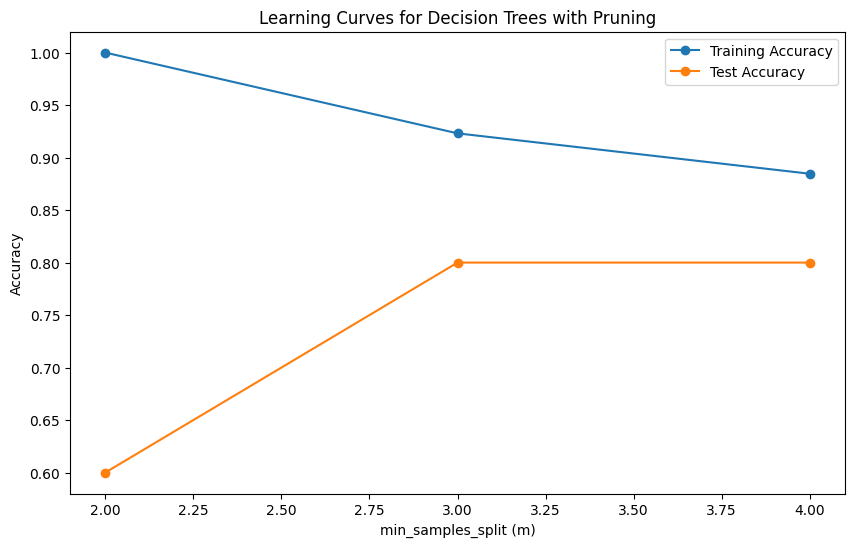

Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
0             p1  1864.0           0           0           0           0   
1             p2  1868.0           1           1           0           0   
8             p9  1916.0           0           0           0           0   
29           o12  1976.0           1           1           0           1   
27           o10  1960.0           1           1           0           0   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
0            1           0           0           1           1            0   
1            0           0           1           1           1            0   
8            1           0           0           1           0            0   
29           1           0           0           0           0            1   
27           0           1           0           0           0            0   

    Winner  Predict

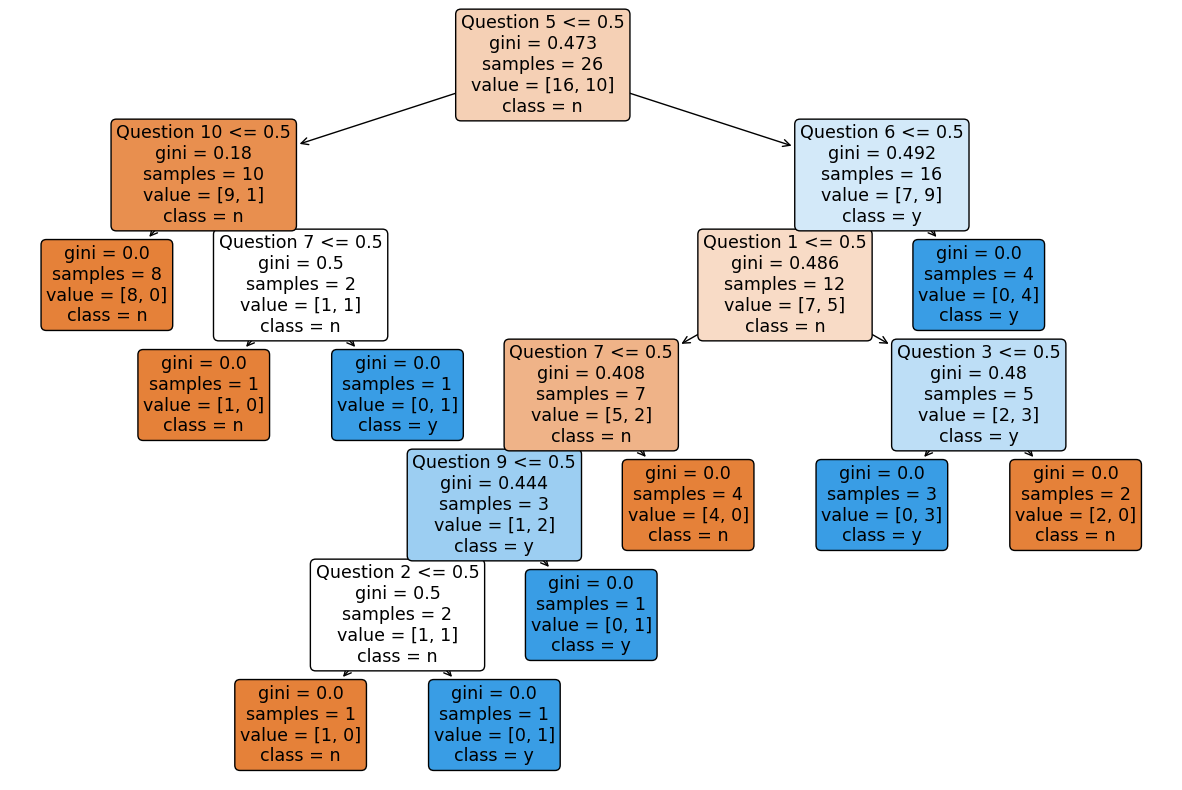

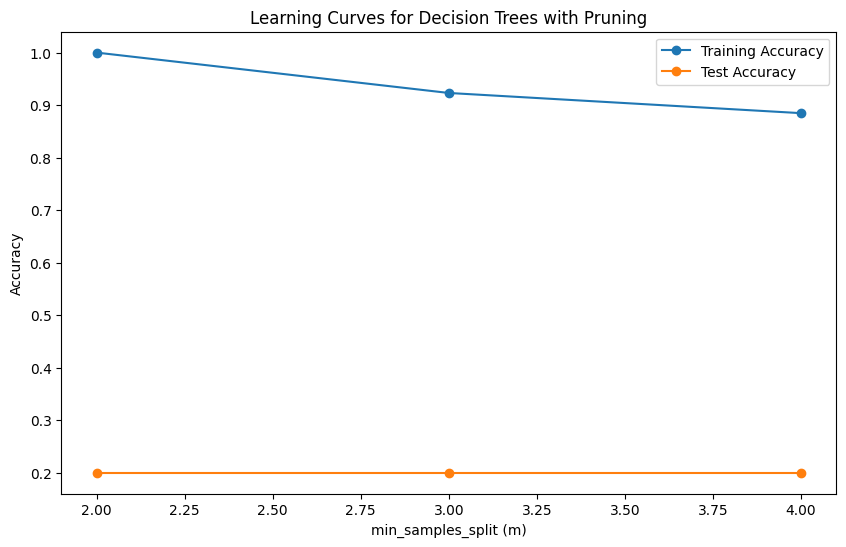

Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
0             p1  1864.0           0           0           0           0   
1             p2  1868.0           1           1           0           0   
8             p9  1916.0           0           0           0           0   
29           o12  1976.0           1           1           0           1   
27           o10  1960.0           1           1           0           0   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
0            1           0           0           1           1            0   
1            0           0           1           1           1            0   
8            1           0           0           1           0            0   
29           1           0           0           0           0            1   
27           0           1           0           0           0            0   

    Winner  Predict

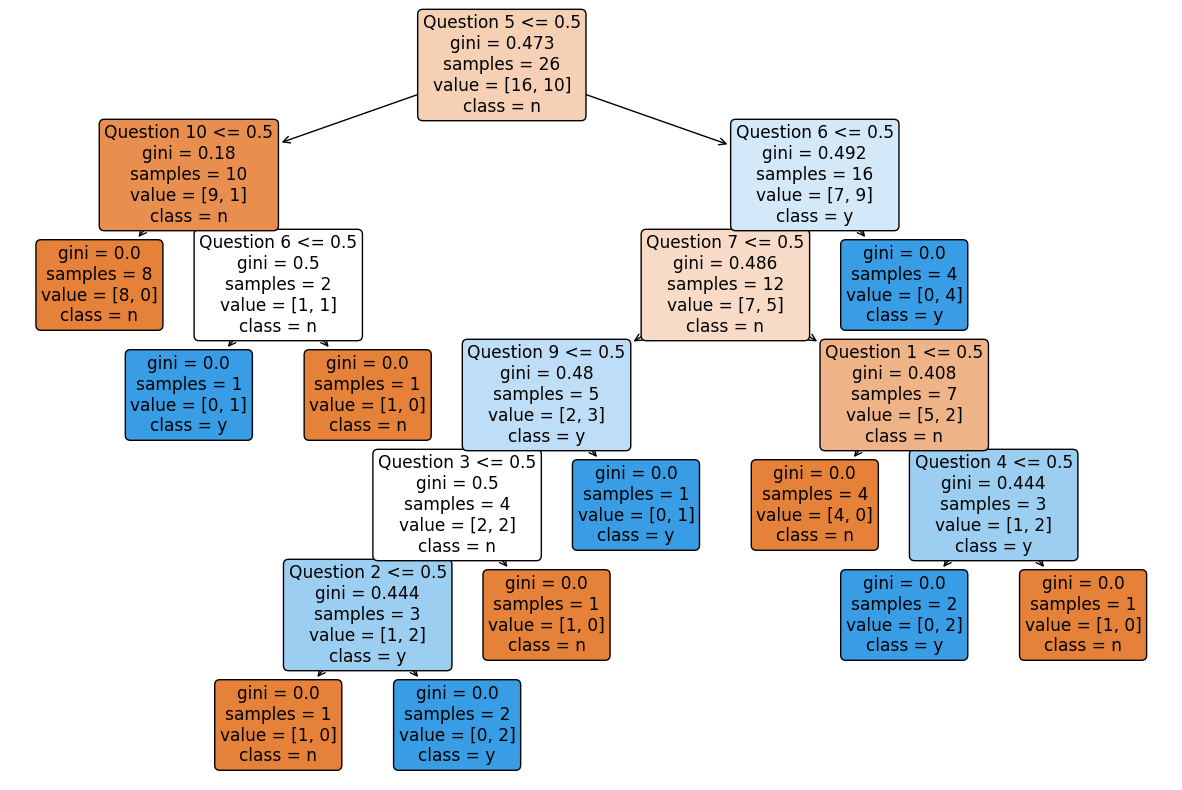

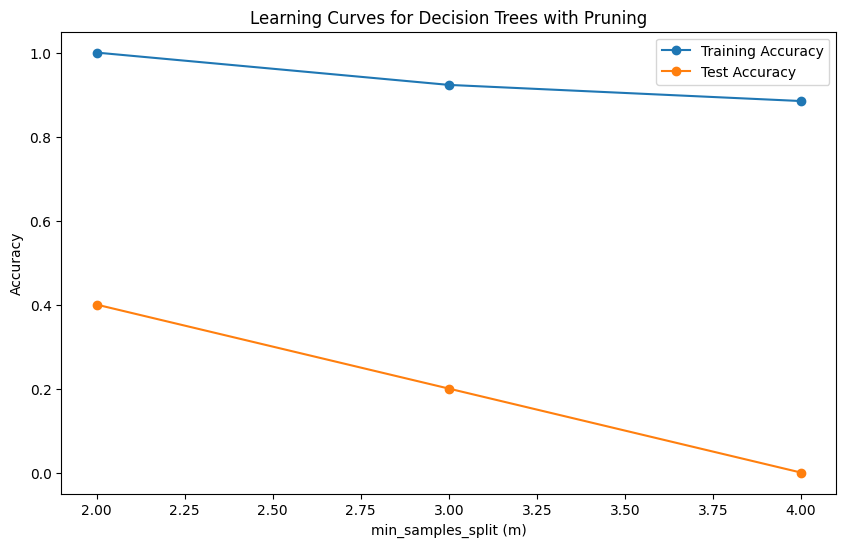

Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
5             p6  1900.0           0           1           0           0   
3             p4  1880.0           1           0           0           1   
13           p14  1944.0           1           1           0           0   
26            o9  1952.0           1           0           0           1   
28           o11  1968.0           1           1           1           1   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
5            1           0           1           0           0            0   
3            0           0           1           1           0            0   
13           1           0           1           1           0            0   
26           0           0           1           0           0            1   
28           0           0           1           1           1            0   

    Winner  Predict

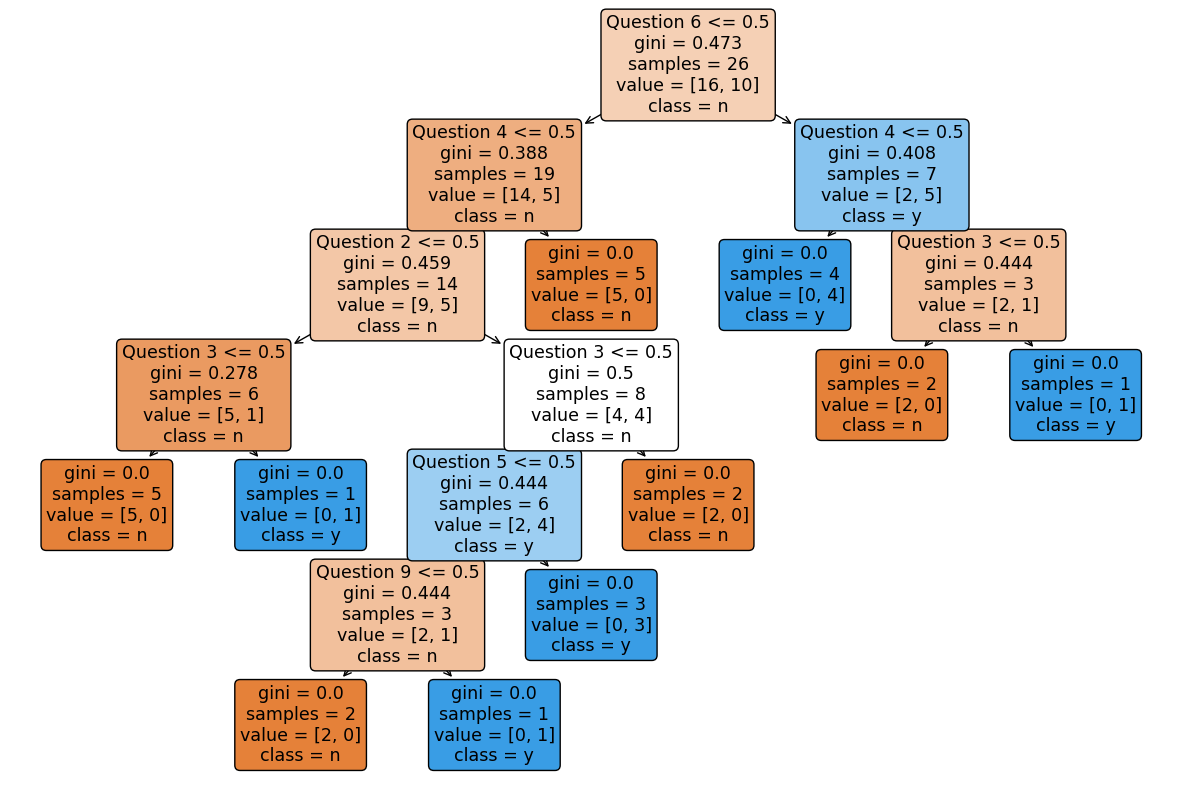

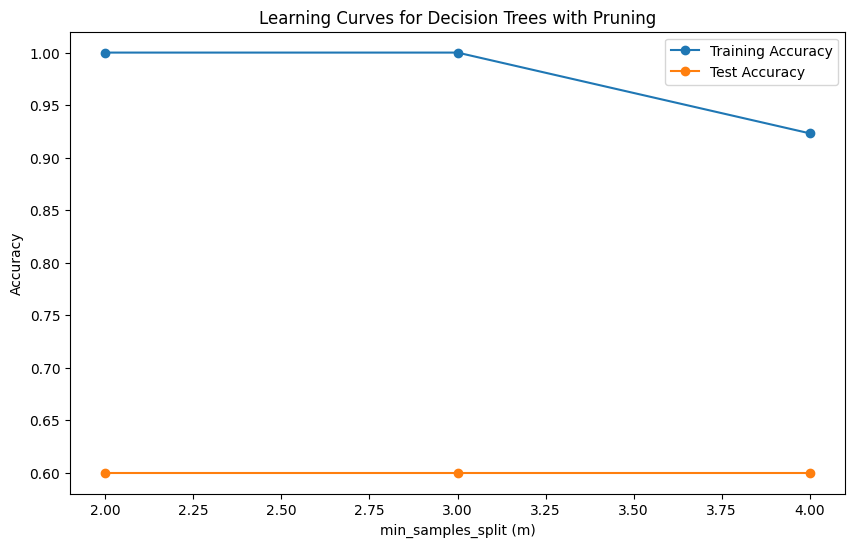

In [11]:
for i in range(0,8):

    z = np.random.randint(40,61)
    test_party_p = party_p.sample(3, random_state=z)
    test_party_o = party_o.sample(2, random_state=z)
    test_set = pd.concat([test_party_p, test_party_o])

    train_set = df.drop(test_set.index)

    run_decision_tree(train_set, test_set)
    decision_tree_pruning(train_set, test_set)

### Task 3

In [12]:
def comparisonwithKNN(train_set, test_set, best_m):
    
    X_train = train_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
    y_train = train_set['Winner']
    X_test = test_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
    y_test = test_set['Winner']
    
    clf_tree = DecisionTreeClassifier(min_samples_split=best_m)
    clf_tree.fit(X_train, y_train)

    # Train kNN with k=1
    clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
    clf_knn_1.fit(X_train, y_train)

    # Train kNN with k=3
    clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
    clf_knn_3.fit(X_train, y_train)

    # Make predictions for decision tree
    y_pred_tree = clf_tree.predict(X_test)

    # Make predictions for kNN with k=1
    y_pred_knn_1 = clf_knn_1.predict(X_test)

    # Make predictions for kNN with k=3
    y_pred_knn_3 = clf_knn_3.predict(X_test)

    # Calculate error rates
    error_rate_tree = 1 - accuracy_score(y_test, y_pred_tree)
    error_rate_knn_1 = 1 - accuracy_score(y_test, y_pred_knn_1)
    error_rate_knn_3 = 1 - accuracy_score(y_test, y_pred_knn_3)

    # Print error rates
    print(f"Decision Tree Error Rate: {error_rate_tree:.2%}")
    print(f"kNN (k=1) Error Rate: {error_rate_knn_1:.2%}")
    print(f"kNN (k=3) Error Rate: {error_rate_knn_3:.2%}")

In [13]:
# z = np.random.randint(40,61)
# test_party_p = party_p.sample(3, random_state=z)
# test_party_o = party_o.sample(2, random_state=z)
# test_set = pd.concat([test_party_p, test_party_o])

train_set = df.drop(test_set.index)

comparisonwithKNN(train_set, test_set, 4)

Decision Tree Error Rate: 40.00%
kNN (k=1) Error Rate: 60.00%
kNN (k=3) Error Rate: 40.00%


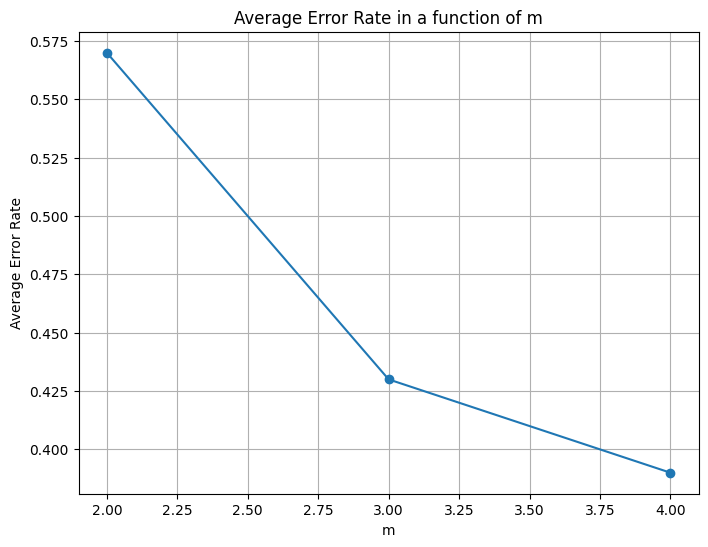

In [26]:
import matplotlib.pyplot as plt

# Values of m and corresponding average error rates
m_values = [2, 3, 4]
average_error_rates = [0.57, 0.43, 0.39]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(m_values, average_error_rates, marker='o', linestyle='-')
plt.title('Average Error Rate in a function of m')
plt.xlabel('m')
plt.ylabel('Average Error Rate')
plt.grid(True)
plt.xticks(m_values)
plt.xscale('linear')  # Scale x-axis linearly
plt.show()


### Task 4

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron

In [15]:
# z = np.random.randint(40,61)
# test_party_p = party_p.sample(3, random_state=z)
# test_party_o = party_o.sample(2, random_state=z)
# test_set = pd.concat([test_party_p, test_party_o])

# train_set = df.drop(test_set.index)

X_train = train_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
y_train = train_set['Winner']
X_test = test_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
y_test = test_set['Winner']

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predictions using LDA
y_pred_lda = lda.predict(X_test)

# Rosenblatt Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Predictions using Perceptron
y_pred_perceptron = perceptron.predict(X_test)

# Threshold optimization for Fisher's Discriminant
thresholds = np.arange(-10, 10, 0.1)
error_rates = []

for threshold in thresholds:
    y_pred_fisher = (lda.predict_proba(X_test)[:, 1] > threshold).astype(int)
    error_rate = sum(y_pred_fisher != y_test) / len(y_test)
    error_rates.append(error_rate)

# Choose the threshold that minimizes the error rate
optimal_threshold = thresholds[np.argmin(error_rates)]
y_pred_fisher_optimal = (lda.predict_proba(X_test)[:, 1] > optimal_threshold).astype(int)

# Calculate accuracy for each method
accuracy_lda = accuracy_score(y_test, y_pred_lda)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
accuracy_fisher_optimal = accuracy_score(y_test, y_pred_fisher_optimal)

# Print results
print(f"Accuracy using Linear Discriminant Analysis: {accuracy_lda:.2%}")
print(f"Accuracy using Rosenblatt Perceptron: {accuracy_perceptron:.2%}")
print(f"Accuracy using Fisher's Discriminant with optimal threshold: {accuracy_fisher_optimal:.2%}")

Accuracy using Linear Discriminant Analysis: 40.00%
Accuracy using Rosenblatt Perceptron: 40.00%
Accuracy using Fisher's Discriminant with optimal threshold: 60.00%


In [16]:
test_set = df.loc[[9, 16, 12, 22, 20]]
test_set

,Party Victory,Year,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,Winner
9,p10,1924.0,0,1,1,0,1,0,1,1,0,1,0
16,p17,1964.0,0,0,0,0,1,0,1,0,0,0,0
12,p13,1940.0,1,1,0,0,1,1,1,1,0,0,1
22,o5,1896.0,0,0,0,1,0,1,0,1,1,0,0
20,o3,1884.0,1,0,0,1,0,0,1,0,1,0,0


In [17]:
train_set = df.drop([9, 16, 12, 22, 20])

In [18]:
def decision_tree_pruning_updated(train_set, test_set):
    
    X_train = train_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
    y_train = train_set['Winner']
    X_test = test_set.drop(['Party Victory', 'Year', 'Winner'], axis=1)
    y_test = test_set['Winner']

    # Values of m to try
    m_values = [2, 3, 4]

    # Store errors for different values of m
    train_errors = []
    test_errors = []

    for m in m_values:
        # Create a decision tree classifier
        clf = DecisionTreeClassifier(min_samples_split=m)

        # Train the classifier on the training data
        clf.fit(X_train, y_train)

        # Make predictions on the training and test data
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        # Calculate error rate for training and test sets
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        test_error = 1 - accuracy_score(y_test, y_test_pred)

        # Store errors
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(m_values, train_errors, label='Training Error', marker='o')
    plt.plot(m_values, test_errors, label='Test Error', marker='o')
    plt.xlabel('m values')
    plt.ylabel('Error Rate')
    plt.title('Learning Curves for Decision Trees with Pruning')
    plt.legend()
    plt.show()

    # Calculate and print average errors
    avg_training_error = np.mean(train_errors)
    avg_testing_error = np.mean(test_errors)
    
    print("\nAverage Errors:")
    print(f"  Average Training Error: {avg_training_error:.4f}")
    print(f"  Average Test Error: {avg_testing_error:.4f}")

    return avg_training_error, avg_testing_error


Test DataFrame with Actual and Predicted Values:
   Party Victory    Year  Question 1  Question 2  Question 3  Question 4  \
9            p10  1924.0           0           1           1           0   
16           p17  1964.0           0           0           0           0   
12           p13  1940.0           1           1           0           0   
22            o5  1896.0           0           0           0           1   
20            o3  1884.0           1           0           0           1   

    Question 5  Question 6  Question 7  Question 8  Question 9  Question 10  \
9            1           0           1           1           0            1   
16           1           0           1           0           0            0   
12           1           1           1           1           0            0   
22           0           1           0           1           1            0   
20           0           0           1           0           1            0   

    Winner  Predict

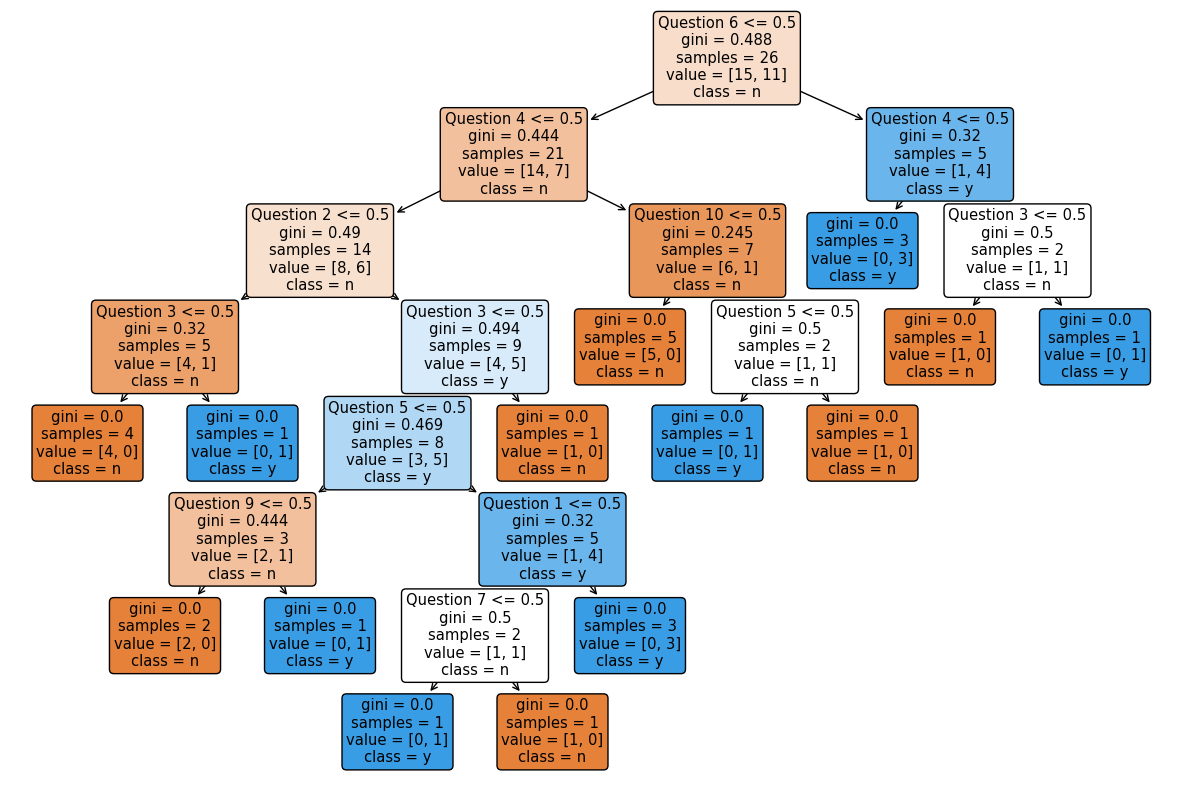

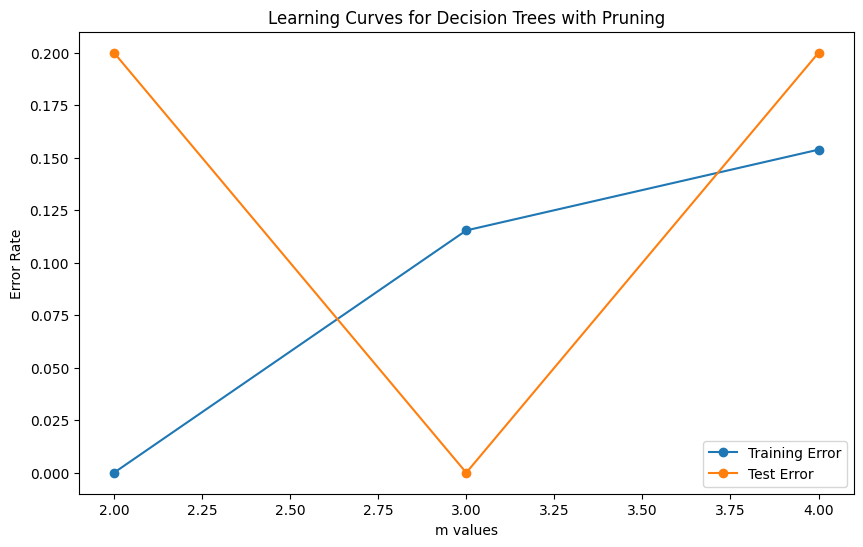


Average Errors:
  Average Training Error: 0.0897
  Average Test Error: 0.1333


In [19]:
run_decision_tree(train_set, test_set)

avg_train_error, avg_test_error = decision_tree_pruning_updated(train_set, test_set)

### Task 5

In [20]:
from sklearn.cluster import KMeans
# Creating DataFrame
df = pd.DataFrame(df)

# Selecting features (questions 1 to 10)
X = df.iloc[:, 2:12]

# Clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Assigning cluster labels to DataFrame
df['Cluster'] = clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### When K=2

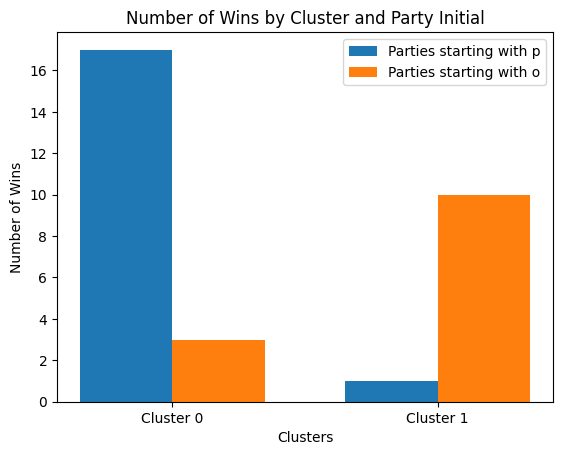

In [21]:
import matplotlib.pyplot as plt

# Count the number of wins of parties starting with 'p' and 'o' in each cluster
p_wins_cluster0 = df[(df['Party Victory'].str.startswith('p')) & (df['Cluster'] == 0)].shape[0]
p_wins_cluster1 = df[(df['Party Victory'].str.startswith('p')) & (df['Cluster'] == 1)].shape[0]
o_wins_cluster0 = df[(df['Party Victory'].str.startswith('o')) & (df['Cluster'] == 0)].shape[0]
o_wins_cluster1 = df[(df['Party Victory'].str.startswith('o')) & (df['Cluster'] == 1)].shape[0]

# Plotting
labels = ['Cluster 0', 'Cluster 1']
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()

# Plotting bars for parties starting with 'p'
p1 = ax.bar([i - width/2 for i in x], [p_wins_cluster0, p_wins_cluster1], width, label='Parties starting with p')

# Plotting bars for parties starting with 'o'
p2 = ax.bar([i + width/2 for i in x], [o_wins_cluster0, o_wins_cluster1], width, label='Parties starting with o')

ax.set_xlabel('Clusters')
ax.set_ylabel('Number of Wins')
ax.set_title('Number of Wins by Cluster and Party Initial')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([p1, p2], ['Parties starting with p', 'Parties starting with o'])

plt.show()


In [22]:
# Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Assigning cluster labels to DataFrame
df['Cluster'] = clusters

df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Party Victory,Year,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,Winner,Cluster
0,p1,1864.0,0,0,0,0,1,0,0,1,1,0,0,0
1,p2,1868.0,1,1,0,0,0,0,1,1,1,0,1,2
2,p3,1872.0,1,1,0,0,1,0,1,0,0,0,1,1
3,p4,1880.0,1,0,0,1,0,0,1,1,0,0,0,2
4,p5,1888.0,0,0,0,0,1,0,0,0,0,0,0,0
5,p6,1900.0,0,1,0,0,1,0,1,0,0,0,0,1
6,p7,1904.0,1,1,0,0,1,0,0,0,0,0,1,1
7,p8,1908.0,1,1,0,0,0,0,0,1,0,0,0,1
8,p9,1916.0,0,0,0,0,1,0,0,1,0,0,0,0
9,p10,1924.0,0,1,1,0,1,0,1,1,0,1,0,0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


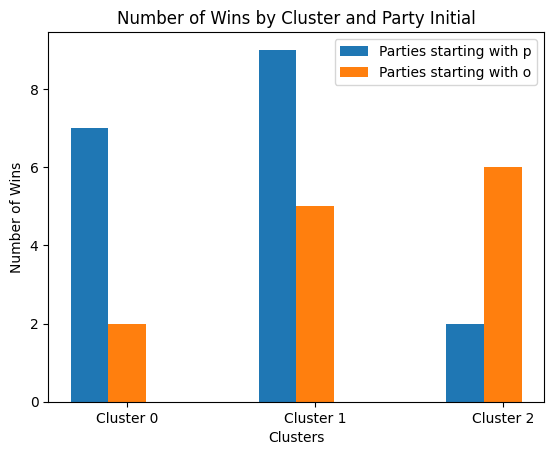

In [23]:
import matplotlib.pyplot as plt

# Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Count the number of wins of parties starting with 'p' and 'o' in each cluster
p_wins_cluster0 = df[(df['Party Victory'].str.startswith('p')) & (df['Cluster'] == 0)].shape[0]
p_wins_cluster1 = df[(df['Party Victory'].str.startswith('p')) & (df['Cluster'] == 1)].shape[0]
p_wins_cluster2 = df[(df['Party Victory'].str.startswith('p')) & (df['Cluster'] == 2)].shape[0]
o_wins_cluster0 = df[(df['Party Victory'].str.startswith('o')) & (df['Cluster'] == 0)].shape[0]
o_wins_cluster1 = df[(df['Party Victory'].str.startswith('o')) & (df['Cluster'] == 1)].shape[0]
o_wins_cluster2 = df[(df['Party Victory'].str.startswith('o')) & (df['Cluster'] == 2)].shape[0]

# Plotting
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
x = range(len(labels))
width = 0.2  # reduce the width of bars for better separation

fig, ax = plt.subplots()

# Plotting bars for parties starting with 'p'
p1 = ax.bar([i - width for i in x], [p_wins_cluster0, p_wins_cluster1, p_wins_cluster2], width, label='Parties starting with p')

# Plotting bars for parties starting with 'o'
p2 = ax.bar(x, [o_wins_cluster0, o_wins_cluster1, o_wins_cluster2], width, label='Parties starting with o')

ax.set_xlabel('Clusters')
ax.set_ylabel('Number of Wins')
ax.set_title('Number of Wins by Cluster and Party Initial')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([p1, p2], ['Parties starting with p', 'Parties starting with o'])

plt.show()

In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your dataset loaded into a DataFrame named 'data'
# You may need to preprocess your data to ensure it only contains relevant features


# Clustering with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
cluster_labels_2 = kmeans_2.fit_predict(X)

# Clustering with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
cluster_labels_3 = kmeans_3.fit_predict(X)

# Evaluating clustering quality with silhouette score
silhouette_score_2 = silhouette_score(X, cluster_labels_2)
silhouette_score_3 = silhouette_score(X, cluster_labels_3)

print("Silhouette Score (k=2):", silhouette_score_2)
print("Silhouette Score (k=3):", silhouette_score_3)




Silhouette Score (k=2): 0.16975232180011543
Silhouette Score (k=3): 0.15663413031622012


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
